## Topology preserving mapping using the neural gas network (TPM-NG) with swiss roll with hole dataset

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn import datasets, manifold
from sklearn.metrics import mean_squared_error
from scipy.spatial import distance_matrix
import math

%matplotlib widget
import matplotlib.pyplot as plt

In [2]:
# sr_points, sr_color = datasets.make_swiss_roll(n_samples=3000, random_state=99)
sr_points, sr_color = datasets.make_swiss_roll(n_samples=3000, hole=True, random_state=99)

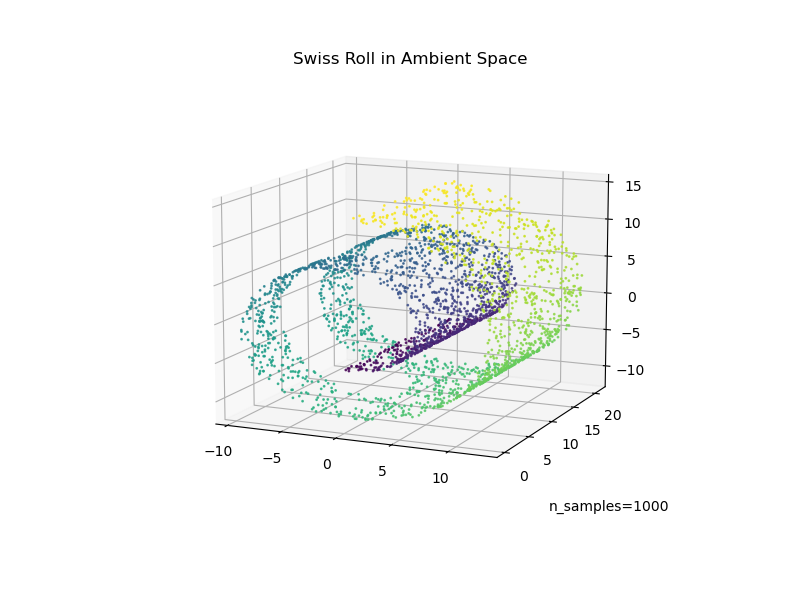

In [3]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=1, alpha=0.8
)
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1000", transform=ax.transAxes)

In [4]:
import networkx as nx
from sklearn.neighbors import kneighbors_graph

A = kneighbors_graph(sr_points, 5, mode='distance')
G = nx.Graph(A)

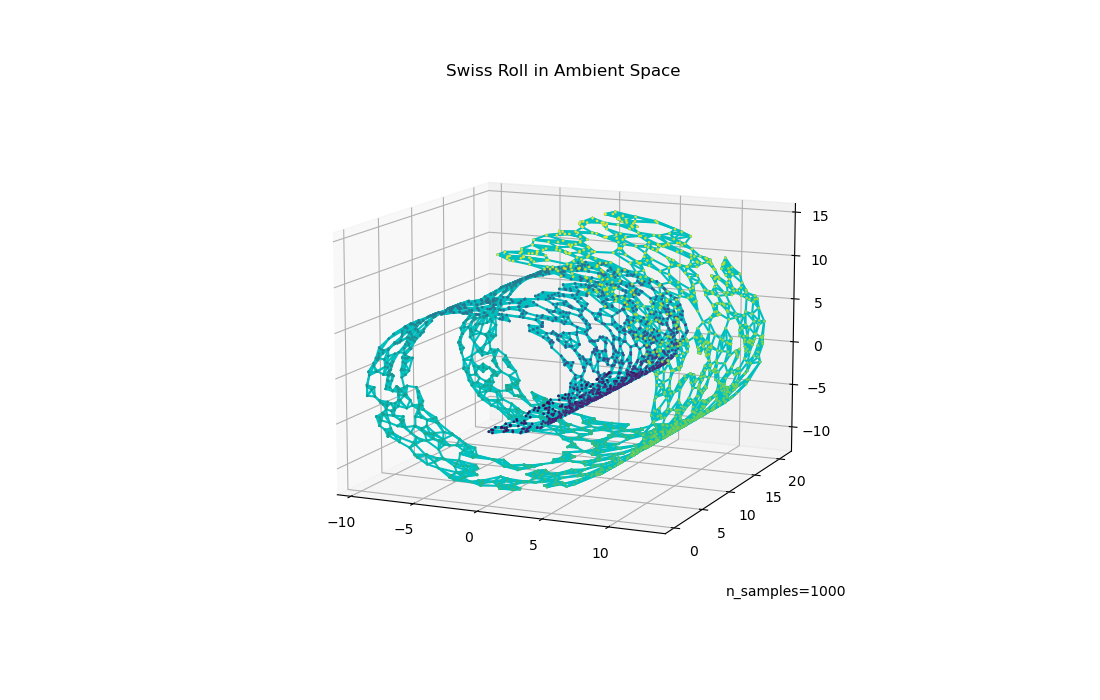

In [5]:
fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=1, alpha=0.8
)
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1000", transform=ax.transAxes)

for i in list(G.edges):
    cx, cy, cz = list(zip(sr_points[i[0]],sr_points[i[1]]))
    ax.plot(cx, cy, cz, 'c-')

In [6]:
mu = sr_points.mean(axis=0)

In [7]:
sigma = sr_points.std(axis=0)

In [8]:
n_sample = 300

In [9]:
# W = np.random.normal(mu, sigma,(n_sample,3))
rnd_index = random.sample(range(len(sr_points)), n_sample)
W = np.array([sr_points[i] for i in rnd_index]) + (np.random.normal(size=(n_sample,3))*10**-5)

In [10]:
dist_wsr = distance_matrix(W, sr_points)

In [11]:
%%time
xi = sr_points.copy()
wo = W.copy()

lr = 0.1
lr_0 = 0.3
lr_f = 0.001
tnow = 20
tmax = 80
lamda_0 = 30
lamda_f = 0.001

while tnow <= tmax:
    w_prev = wo.copy()
    lambda_t = lamda_0*((lamda_f/lamda_0)**(tnow/tmax))
    # dist_wx = distance_matrix(xi, wo)
    sample, dim = xi.shape
    # decay_lr = lr/tnow
    decay_lr = lr_0*((lr_f/lr_0)**(tnow/tmax))
    for i in range(sample):
        
        # r = np.argsort(dist_wx[i])
        
        dist_wxi = distance_matrix([xi[i]],wo)[0]
        r = np.argsort(dist_wxi)
        
        for j in range(len(r)):
            h_lambda = np.exp(-(j)/lambda_t)
            adj_j = r[j]
            wo[adj_j] = wo[adj_j] + decay_lr*(h_lambda)*(xi[i] - wo[adj_j])
    mse_error = mean_squared_error(w_prev, wo)
    if mse_error < 10**-7:
        break
    print("Epoch ..", tnow, "lr =", decay_lr, "lambda =", lambda_t, "MSE --> ", mse_error)
    tnow += 1

Epoch .. 20 lr = 0.07208434242404263 lambda = 2.2795070569547775 MSE -->  0.25447356369904983
Epoch .. 21 lr = 0.0671238603768575 lambda = 2.003904060837463 MSE -->  0.03396976676165098
Epoch .. 22 lr = 0.06250473376572112 lambda = 1.7616227476853736 MSE -->  0.010458568454931124
Epoch .. 23 lr = 0.058203472225662585 lambda = 1.5486343711812445 MSE -->  0.004812889553489731
Epoch .. 24 lr = 0.05419820188053226 lambda = 1.3613972791592601 MSE -->  0.0028170032662582158
Epoch .. 25 lr = 0.05046855410436798 lambda = 1.1967980216586083 MSE -->  0.0018596408558211096
Epoch .. 26 lr = 0.04699556193764456 lambda = 1.0520995792870254 MSE -->  0.0014111651427280488
Epoch .. 27 lr = 0.04376156363163645 lambda = 0.9248958510157762 MSE -->  0.0010965078634464277
Epoch .. 28 lr = 0.04075011283037231 lambda = 0.8130716446117171 MSE -->  0.0008824559218651189
Epoch .. 29 lr = 0.03794589493341596 lambda = 0.7147675044120462 MSE -->  0.000672502698595628
Epoch .. 30 lr = 0.03533464921414029 lambda = 0.

In [12]:
A = kneighbors_graph(wo, 4, mode='distance')
G = nx.Graph(A)

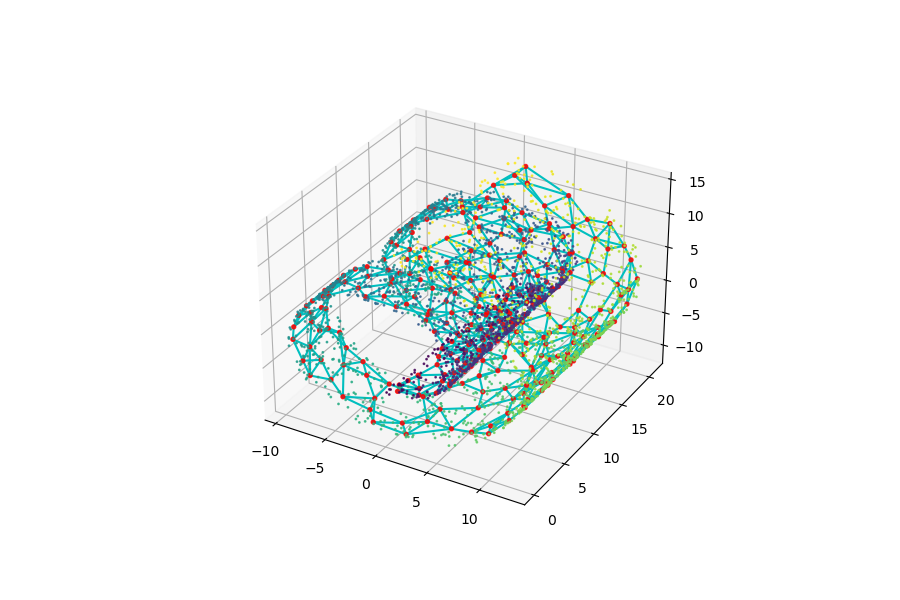

In [13]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)

# cmap = np.random.rand(len(wo),)
cmap = "red"

ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=1, alpha=0.8
)

ax.scatter(
    wo[:, 0], wo[:, 1], wo[:, 2], c=cmap, s=8, alpha=0.8
)
for i in list(G.edges):
    cx, cy, cz = list(zip(wo[i[0]],wo[i[1]]))
    ax.plot(cx, cy, cz, 'c-')

In [14]:
Z = np.random.normal(size=(n_sample,2))

In [15]:
%%time

d_euclidean = lambda x: np.sqrt(np.inner(x, x))

zo = Z.copy()
xi = sr_points.copy()
lr_0 = 0.12
lr_f = 0.005
tnow = 1
tmax = 15
lamda_0 = 600
lamda_f = 0.001

while tnow <= tmax:
    z_prev = zo.copy()
    lambda_t = lamda_0*((lamda_f/lamda_0)**(tnow/tmax))
    sample, dim = xi.shape
    # decay_lr = lr
    decay_lr = lr_0*((lr_f/lr_0)**(tnow/tmax))
    dist_wx = distance_matrix(xi, wo)
    for i in range(sample):
        winner_id = np.argmin(dist_wx[i])
        g_path = nx.shortest_path_length(G, source=winner_id, weight='weight')
        g_distance = [(k, v) for k, v in dict(g_path).items()]
        g_distance = sorted(g_distance, key = lambda d: d[1])
        for j in range(len(g_distance)):
            f_r = np.exp(-(j)/lambda_t)
            adj_j = g_distance[j][0]
            D_w = g_distance[j][1]
            d_z = d_euclidean(zo[adj_j]-zo[winner_id])
            if d_z == 0:
                continue
            zo[adj_j] = zo[adj_j] + decay_lr*f_r*((d_z-D_w)/d_z)*(zo[winner_id]-zo[adj_j])
    mse_error = mean_squared_error(z_prev, zo)
    print("Epoch ..", tnow, "lr =", decay_lr, "lambda =", lambda_t, "MSE --> ", mse_error)
    if mse_error < 10**-7:
        break
    tnow += 1

Epoch .. 1 lr = 0.09708835958543803 lambda = 247.13893283371397 MSE -->  500.3467610471741
Epoch .. 2 lr = 0.0785512463915943 lambda = 101.79608687031161 MSE -->  1.488060664362338
Epoch .. 3 lr = 0.06355343046292873 lambda = 41.92962712629475 MSE -->  0.20359467226217126
Epoch .. 4 lr = 0.05141915258060797 lambda = 17.270738836846718 MSE -->  0.0372096050291356
Epoch .. 5 lr = 0.04160167646103809 lambda = 7.113786608980128 MSE -->  0.003959462890245572
Epoch .. 6 lr = 0.033658654363385984 lambda = 2.9301560515835208 MSE -->  0.0007776342115945656
Epoch .. 7 lr = 0.02723219614995326 lambda = 1.2069260660410006 MSE -->  0.0001254375985485148
Epoch .. 8 lr = 0.02203274376756536 lambda = 0.4971306999509425 MSE -->  8.049146685472166e-06
Epoch .. 9 lr = 0.017826024579660035 lambda = 0.204767251107922 MSE -->  1.8225371943496522e-08
CPU times: total: 1min 11s
Wall time: 1min 12s


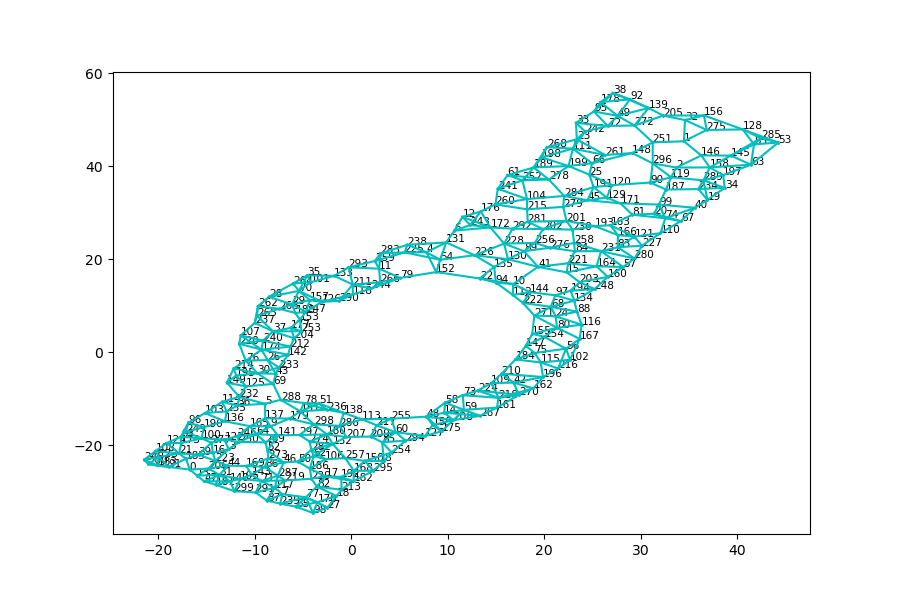

In [16]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111)
fig.add_axes(ax)

cmap = "red"

ax.scatter(
    zo[:, 0], zo[:, 1], s=1, alpha=0.8
)

for i in range(len(zo)): #plot each point + it's index as text above
    ax.text(zo[i,0],zo[i,1],  '%s' % (str(i)), size=7.5, zorder=1,  color='k')

for i in list(G.edges):
    cx, cy = list(zip(zo[i[0]],zo[i[1]]))
    ax.plot(cx, cy, 'c-')
plt.show()

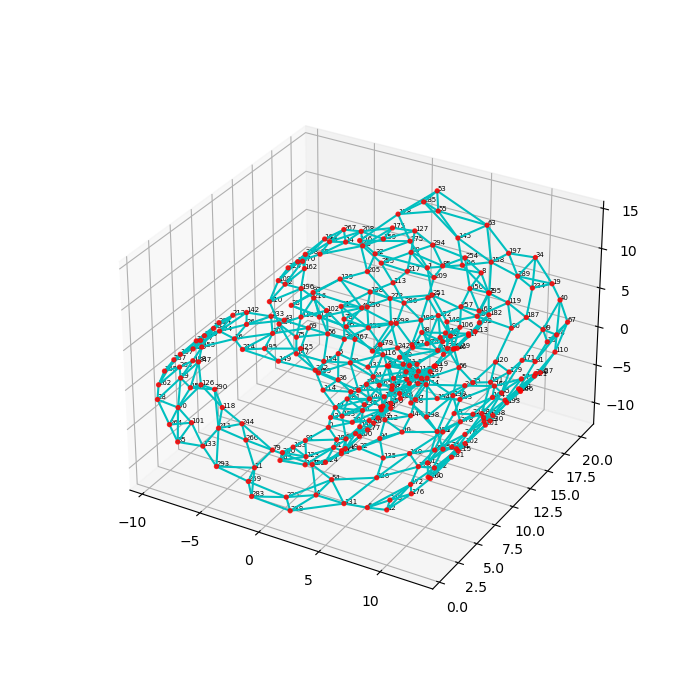

In [17]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)

cmap = "red"

# ax.scatter(
#     sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=1, alpha=0.8
# )

ax.scatter(
    wo[:, 0], wo[:, 1], wo[:, 2], c=cmap, s=8, alpha=0.8
)
for i in range(len(wo)): #plot each point + it's index as text above
    ax.text(wo[i,0],wo[i,1],wo[i,2],  '%s' % (str(i)), size=5, zorder=1,  color='k')
    
for i in list(G.edges):
    cx, cy, cz = list(zip(wo[i[0]],wo[i[1]]))
    ax.plot(cx, cy, cz, 'c-')